

## Assignment 1 [Part A] Cleaning and EDA

**_Yitong Liu,  NUID:  001822175_**

### Dataset Description:

    The datasets I picked is a history of crime statistics from 2004 to 2016 per province and station for South Africa. The crime statistics generated by SAPS is an important link in the value chain of the statistics system informs policy development and planning in the criminal justice system. Analysing these data ensures can help policy-makers with making policy decisions. There are such 4 kinds of fields included in the raw datasets: 
 > 
  * **Province**
  * **Station**
  * **Category**
  * **Year_Range**  --There are 11 years ranges(2005-2006, 2006-2007,...,2015-2016).
  *     **Police_bounds** --This is the file used to get the map of the South Africa.(Police_bounds.shp)

  14 columns of data included totally for above kinds of data, and all the columns will be kept in the dataset.    
 
 

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import csv
## read the data from csv
CrimeStatistics = pd.read_csv('CrimeStatistics.csv', header=0)
## show the data samples of first 10 lines
CrimeStatistics.head()
plt.rcParams['figure.figsize'] = (15, 9)

In [23]:
## read the data from csv
CrimeStatistics = pd.read_csv('CrimeStatistics.csv', header=0)
## show the data samples of first 10 lines
CrimeStatistics.head()
plt.rcParams['figure.figsize'] = (15, 9)

### Data cleaning

* Are there missing values?
* Are there inappropraite values?
* Remove or impute any bad data.


In [24]:
## show the data samples of first 10 lines
CrimeStatistics.head(10)

Province            Station                           Category  \
0   Western Cape  Cape Town Central  All theft not mentioned elsewhere   
1        Gauteng        Jhb Central  All theft not mentioned elsewhere   
2   Western Cape    Mitchells Plain  All theft not mentioned elsewhere   
3     Free State          Park Road  All theft not mentioned elsewhere   
4        Gauteng   Pretoria Central  All theft not mentioned elsewhere   
5     North West         Rustenburg  All theft not mentioned elsewhere   
6  Kwazulu/Natal     Durban Central  All theft not mentioned elsewhere   
7        Gauteng           Brooklyn  All theft not mentioned elsewhere   
8        Gauteng           Booysens  All theft not mentioned elsewhere   
9        Gauteng           Hillbrow  All theft not mentioned elsewhere   

   2005-2006  2006-2007  2007-2008  2008-2009  2009-2010  2010-2011  \
0       6692       6341       5966       5187       4985       5127   
1       6093       4602       3761       3610       3267       3037   
2       5341       6093       6316       6803       6035       5761   
3       5108       4282       3834       3316       3101       3013   
4       5099       4536       3309       2694       2616       2606   
5       4239       4173       3398       3388       2737       2117   
6       4162       4529       3499       3353       3183       2933   
7       3931       3583       2878       2568       2415       2162   
8       3681       3277       2849       2603       2580       3107   
9       3489       2914       3093       2706       2250       2298   

   2011-2012  2012-2013  2013-2014  2014-2015  2015-2016  
0       5285       5937       5600       5335       5176  
1       2886       2638       2809       3050       2434  
2       6108       5514       4975       4043       3635  
3       2679       3116       2927       2297       2103  
4       2635       3226       3246       2892       3030  
5       2139       1914       1897       1868       1862  
6       3219       3418       3390       2872       2865  
7       2050       1883       2442       2200       2107  
8       2568       1339       1290       1039        943  
9       2051       1835       1610       1607       1618

In [25]:
## show the data samples of last 10 lines
CrimeStatistics.tail(10)

Province        Station  \
30851        Limpopo     Westenburg   
30852     Free State        Zamdela   
30853        Gauteng  Mamelodi East   
30854        Gauteng      Diepsloot   
30855  Kwazulu/Natal     Kwamashu E   
30856   Western Cape         Belhar   
30857        Gauteng     Moffatview   
30858   Western Cape         Belhar   
30859   Western Cape      Lentegeur   
30860   Western Cape      Lentegeur   

                                                Category  2005-2006  \
30851                  All theft not mentioned elsewhere          0   
30852                                     Common assault          0   
30853  Assault with the intent to inflict grievous bo...          0   
30854  Assault with the intent to inflict grievous bo...          0   
30855                                        Shoplifting          0   
30856                  All theft not mentioned elsewhere          0   
30857                  All theft not mentioned elsewhere          0   
30858                                 Drug-related crime          0   
30859                  All theft not mentioned elsewhere          0   
30860                                 Drug-related crime          0   

       2006-2007  2007-2008  2008-2009  2009-2010  2010-2011  2011-2012  \
30851          0          0          0          0          0          0   
30852          0          0          0          0          0        567   
30853        489        834        774        797        588        645   
30854          0          0          0          0        156        590   
30855          0          0          0          0        170        364   
30856          0        250        837        710        746        839   
30857          0          0          0          0          0          0   
30858          0         54        238        291        583        840   
30859          0          0          0          0          0          0   
30860          0          0          0          0          0          0   

       2012-2013  2013-2014  2014-2015  2015-2016  
30851        698        758        644        691  
30852        649        756        562        692  
30853        650        664        766        732  
30854        594        612        528        776  
30855        439        468        829        802  
30856        762        882       1015        829  
30857       1012       1195       1294        991  
30858       1117       1197       1237       1401  
30859          0       1300       2346       1989  
30860          0       1126       1933       2050

In [26]:
# show how many rows of the dataset
len(CrimeStatistics)

30861

### Data Cleaning
   * Any there Missing values？ 
   
      ** There isn't any mising values for each columns. The dataset itself has some values equals to 0, and in fact, it is reasonable to be zero. So I didnt't change these 0 with the mean of each column, or delete these 0. **

In [7]:
CrimeStatistics.isnull().sum()

Province     0
Station      0
Category     0
2005-2006    0
2006-2007    0
2007-2008    0
2008-2009    0
2009-2010    0
2010-2011    0
2011-2012    0
2012-2013    0
2013-2014    0
2014-2015    0
2015-2016    0
dtype: int64

In [8]:
# the info of the dataset, and the data formats are showed below, int and object.
CrimeStatistics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30861 entries, 0 to 30860
Data columns (total 14 columns):
Province     30861 non-null object
Station      30861 non-null object
Category     30861 non-null object
2005-2006    30861 non-null int64
2006-2007    30861 non-null int64
2007-2008    30861 non-null int64
2008-2009    30861 non-null int64
2009-2010    30861 non-null int64
2010-2011    30861 non-null int64
2011-2012    30861 non-null int64
2012-2013    30861 non-null int64
2013-2014    30861 non-null int64
2014-2015    30861 non-null int64
2015-2016    30861 non-null int64
dtypes: int64(11), object(3)
memory usage: 3.3+ MB


### Data cleaning

* Are there missing values?
* Are there inappropraite values?
* Remove or impute any bad data.


In [9]:
pd.options.display.float_format = '{:,.3f}'.format

In [10]:
CrimeStatistics.describe()

2005-2006  2006-2007  2007-2008  2008-2009  2009-2010  2010-2011  \
count 30,861.000 30,861.000 30,861.000 30,861.000 30,861.000 30,861.000   
mean      70.528     69.302     67.154     68.756     69.518     67.767   
std      205.492    198.038    186.761    187.174    185.515    181.866   
min        0.000      0.000      0.000      0.000      0.000      0.000   
25%        0.000      0.000      0.000      0.000      1.000      0.000   
50%        8.000      8.000      8.000      9.000      9.000      9.000   
75%       49.000     50.000     50.000     52.000     54.000     52.000   
max    6,692.000  6,341.000  6,316.000  6,803.000  6,571.000  6,260.000   

       2011-2012  2012-2013  2013-2014  2014-2015  2015-2016  
count 30,861.000 30,861.000 30,861.000 30,861.000 30,861.000  
mean      68.260     69.701     71.417     71.498     70.736  
std      183.334    184.812    187.635    185.019    179.364  
min        0.000      0.000      0.000      0.000      0.000  
25%        1.000      1.000      1.000      1.000      1.000  
50%       10.000     10.000     11.000     11.000     11.000  
75%       53.000     55.000     56.000     57.000     58.000  
max    6,108.000  6,310.000  6,044.000  5,335.000  5,176.000

####   From the plot above, 
we can get the count, mean, std, min, max, etc, for each column. Each column stands for the whole data and the total number of criminal cases in south Africa. From the mean, min, max, it can be concluded that the trend went up and went down in these eleven years. 
  

In [28]:
# change the name for each column.
CrimeStatistics.columns = ['Province','Station', 'Category',
              'First_year', 'Second_year', 'Third_year', 'Fourth_year','Fifth_year','Sixth_year','Seventh_year','Eighth_year','Ninth_year','Tenth_year','Eleventh_year']

CrimeStatistics.head(5)

Province            Station                           Category  \
0  Western Cape  Cape Town Central  All theft not mentioned elsewhere   
1       Gauteng        Jhb Central  All theft not mentioned elsewhere   
2  Western Cape    Mitchells Plain  All theft not mentioned elsewhere   
3    Free State          Park Road  All theft not mentioned elsewhere   
4       Gauteng   Pretoria Central  All theft not mentioned elsewhere   

   First_year  Second_year  Third_year  Fourth_year  Fifth_year  Sixth_year  \
0        6692         6341        5966         5187        4985        5127   
1        6093         4602        3761         3610        3267        3037   
2        5341         6093        6316         6803        6035        5761   
3        5108         4282        3834         3316        3101        3013   
4        5099         4536        3309         2694        2616        2606   

   Seventh_year  Eighth_year  Ninth_year  Tenth_year  Eleventh_year  
0          5285         5937        5600        5335           5176  
1          2886         2638        2809        3050           2434  
2          6108         5514        4975        4043           3635  
3          2679         3116        2927        2297           2103  
4          2635         3226        3246        2892           3030

In [12]:
CrimeStatistics['Province'].value_counts()

Eastern Cape     5292
Kwazulu/Natal    5022
Western Cape     4050
Gauteng          3861
Free State       2970
Limpopo          2673
Northern Cape    2457
Mpumalanga       2322
North West       2214
Name: Province, dtype: int64

In [13]:
list = ['First_year', 'Second_year', 'Third_year', 'Fourth_year','Fifth_year','Sixth_year','Seventh_year','Eighth_year','Ninth_year','Tenth_year','Eleventh_year']

Crimes_Province = CrimeStatistics.groupby(['Province'])['First_year', 'Second_year', 'Third_year', 'Fourth_year','Fifth_year','Sixth_year','Seventh_year','Eighth_year','Ninth_year','Tenth_year','Eleventh_year'].sum()

Crimes_Category = CrimeStatistics.groupby(['Category'])['First_year', 'Second_year', 'Third_year', 'Fourth_year','Fifth_year','Sixth_year','Seventh_year','Eighth_year','Ninth_year','Tenth_year','Eleventh_year'].sum()

In [14]:
Crimes_Province[list].transpose().plot(kind='line',figsize=(6, 3))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Evolution by Province')

Text(0.5,1,'Evolution by Province')

In [15]:
Crimes_Province.plot(kind='bar', rot=35)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.title('Crime per province')

Text(0.5,1,'Crime per province')

### From this plot, it is obvious that Gauteng, Western Cape and Kwazulu/Natal, these three provinces have morecriminal cases compared with other seven provinces; Northern Cape has the least criminal cases in eleven years. There are a lot of factors can cause these trends. Here are my thoughts:

    There are real improvement and good policies in Northern Cape, on the other side, this province has the least population, so this may be the biggest reason that the number of criminal cases are not as big as in other provinces. Also, there is a dataset shows that in the list of population, Gauteng and Kwasulu/Natal are the first and second one , Western Cape is the fourth one. But the number of criminal cases in Western Cape is bigger than in Kwasulu/Natal. So we may conclude that the government has published some better polices to reduce the crime rates. This conclusion is convinced, as the plot of Kwasulu/Natal is relatively denser, but the trend of Western Cape is going up gradually in each year. So we can say the situation deteriorates in Western Cape. And this province requires some staff changes in staff rotaion, police officer training, and investments in police infrastructure.



In [16]:
cols = Crimes_Province.transpose().columns
Crimes_Province_transpose = Crimes_Province.transpose()
Crimes_Province_transpose['index'] = Crimes_Province_transpose.index

n_rows=9
n_cols=1

for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=1,figsize=(6, 2.5))
    for j in range(n_cols):
        sns.barplot(Crimes_Province_transpose['index'], Crimes_Province_transpose[cols[i]],palette="BuGn_d")
        ax.set_ylabel("Number of Crimes")
        ax.set_xlabel("Period")
        ax.set_xticklabels(Crimes_Province_transpose['index'],rotation=35)
        plt.title(cols[i*n_cols+j])
        

In [17]:
sns.stripplot(x="Province", y="First_year", data=CrimeStatistics, jitter=True)
plt.rcParams['figure.figsize'] = (15, 20)

In [18]:
sns.stripplot(x="Province", y="Second_year", data=CrimeStatistics, jitter=True)


In [19]:
sns.stripplot(x="Province", y="Third_year", data=CrimeStatistics)


### Answer the following questions for the data in each column:


   * Are there anomalies/outliers?
   

In [20]:
CrimeStatistics.describe()

First_year  Second_year  Third_year  Fourth_year  Fifth_year  \
count  30,861.000   30,861.000  30,861.000   30,861.000  30,861.000   
mean       70.528       69.302      67.154       68.756      69.518   
std       205.492      198.038     186.761      187.174     185.515   
min         0.000        0.000       0.000        0.000       0.000   
25%         0.000        0.000       0.000        0.000       1.000   
50%         8.000        8.000       8.000        9.000       9.000   
75%        49.000       50.000      50.000       52.000      54.000   
max     6,692.000    6,341.000   6,316.000    6,803.000   6,571.000   

       Sixth_year  Seventh_year  Eighth_year  Ninth_year  Tenth_year  \
count  30,861.000    30,861.000   30,861.000  30,861.000  30,861.000   
mean       67.767        68.260       69.701      71.417      71.498   
std       181.866       183.334      184.812     187.635     185.019   
min         0.000         0.000        0.000       0.000       0.000   
25%         0.000         1.000        1.000       1.000       1.000   
50%         9.000        10.000       10.000      11.000      11.000   
75%        52.000        53.000       55.000      56.000      57.000   
max     6,260.000     6,108.000    6,310.000   6,044.000   5,335.000   

       Eleventh_year  
count     30,861.000  
mean          70.736  
std          179.364  
min            0.000  
25%            1.000  
50%           11.000  
75%           58.000  
max        5,176.000

#### There is no anomaly or outlier, the max of each column changes in a range from 5100 to 6900, the min of each column is reasonable. 

### Plot each colmun as appropriate for the data type:



* Write a summary of what the plot tells you.

In [21]:
plt.show(CrimeStatistics[['2005-2006','2006-2007','2007-2008','2008-2009','2009-2010','2010-2011','2011-2012','2012-2013','2013-2014','2014-2015','2015-2016']].plot(kind='box'))

KeyError: "['2005-2006' '2006-2007' '2007-2008' '2008-2009' '2009-2010' '2010-2011'\n '2011-2012' '2012-2013' '2013-2014' '2014-2015' '2015-2016'] not in index"

In [ ]:
plt.show(sns.lmplot(x="2005-2006", y="2006-2007",data=CrimeStatistics))

In [ ]:
CrimeStatistics.columns = ['Province','Station', 'Category',
              'First_year', 'Second_year', 'Third_year', 'Fourth_year','Fifth_year','Sixth_year','Seventh_year','Eighth_year','Ninth_year','Tenth_year','Eleventh_year']

CrimeStatistics.head(5)

### Duplication Check
#### These parts are used to check whether there are duplicated rows in the dataset, and it turns out there is no row like that, this dataset is a good one.

In [ ]:
CrimeStatistics.duplicated()

In [ ]:
CrimeStatistics.drop_duplicates()

In [ ]:
CrimeStatistics.isnull()

In [ ]:
CrimeStatistics.describe().astype(np.int64).T

## The Range of Data

   * **I seperate data into 11 range to give them a grade according to the numbers of criminal cases of each year. This is the example of column, "Eleventh_year".**






In [ ]:
bins = [0,1000,2000,3000,4000,5000,6000,7000]
group_names = ['A', 'B', 'C', 'D','E','F','G']
CrimeStatistics['categories'] =pd.cut(CrimeStatistics['Eleventh_year'], bins, labels=group_names)
CrimeStatistics

## Plot each colmun as appropriate for the data type:

* ** Write a summary of what the plot tells you.**

In [ ]:
# This chart shows the trend of "First_year", it is obvious that the province: "Gauteng" has the most criminal cases.
sns.pointplot(x="Province", y="First_year", data=CrimeStatistics)


#### This chart shows the trend of "First_year", it is obvious that the province: "Gauteng" has the most criminal cases.

In [ ]:
sns.pointplot(x="Province", y="First_year", hue="Station", data=CrimeStatistics)


In [ ]:
sns.pointplot(x="Province", y="Second_year", data=CrimeStatistics)


#### This chart shows the trend of "Second_year", it is obvious that the province: "Gauteng" has the most criminal cases.

## Are any of the columns correlated?
   This part explain the question:

In [ ]:
cmap = sns.diverging_palette(0, 255, sep=1, n=256, as_cmap=True)

correlations = CrimeStatistics[[ 'First_year', 'Second_year', 'Third_year', 'Fourth_year','Fifth_year','Sixth_year','Seventh_year','Eighth_year','Ninth_year','Tenth_year','Eleventh_year']].corr()
print (correlations)
sns.heatmap(correlations, cmap=cmap)

In [ ]:
CrimeStatistics.corr()

#### From the data and the chart above, we can see the numerical value of correlations are in the range of 0.80-1.00, so it turns out that the data in each columns are similar, and the general trend of these eleven years didn't fluctuated widely.

In [ ]:
CrimeStatistics.isnull().sum()


In [ ]:
(CrimeStatistics['First_year'] == 0).sum()


In [ ]:
CrimeStatistics.loc[CrimeStatistics['First_year'] < 5]


In [ ]:
cols = Crimes_Category.transpose().columns
Crimes_Category_transpose = Crimes_Category.transpose()
Crimes_Category_transpose['index'] = Crimes_Category_transpose.index

n_rows=27
n_cols=1

for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=1,figsize=(6, 2.5))
    for j in range(n_cols):
        sns.barplot(Crimes_Category_transpose['index'], Crimes_Category_transpose[cols[i]],palette="coolwarm")
        ax.set_ylabel("Number of Crimes")
        ax.set_xlabel("Period")
        ax.set_xticklabels(Crimes_Category_transpose['index'],rotation=35)
        plt.title(cols[i*n_cols+j])


### As we can see:

* From the plots above, there are a lot categories of crimes, 'All theft not mentioned elsewhere','Arson','Assault with the intent to inflict grievous bodily harm','Common robbery', 'Malicious damage to property','Robbery of cash in transit','Sexual offences','Theft of motor vehicl and motorcycle', the trend of these categories are going down gradually.
* 'Bank robbery' is going up quickly and going down quickly, it may because the data lost, but more likely it is the result of strengthen in bank security. 
* 'Attempted murder' is going down and up.
* 'Burglary at non-residential premises' is going up gradually, it means the government should give more investment to manage the transient population and take appropriate measures to solve the problems.

In [ ]:
from wordcloud import WordCloud, STOPWORDS

def wordcloud_by_province(province):
    CrimeStatistics_new = CrimeStatistics[CrimeStatistics.Province == province]
    stopwords = set(STOPWORDS)
    stopwords.add("Total")
    stopwords.add("Crime")
    stopwords.add("Crimes")
    wordcloud = WordCloud(background_color="white",stopwords=stopwords,random_state = 0).generate(" ".join([i for i in CrimeStatistics_new['Category']]))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Wordcloud of the type of crime")

wordcloud_by_province('Gauteng') 

#### From the word cloud, the visual representation of data shows the frequency of all the types of crime in Province 'Gauteng'.

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import shapefile as shp  

plt.figure(figsize=(12,12))
map = Basemap(resolution='i',llcrnrlon=12,llcrnrlat=-35,urcrnrlat=-22,urcrnrlon=36,lat_0=-40,lon_0=0,)

#map.drawmapboundary(fill_color='aqua')
#map.fillcontinents(color='#ddaa66',lake_color='blue')
#map.drawcoastlines()
map.readshapefile('/Users/yitong/Desktop/7390/Police_bounds','Police_bounds')
map.bluemarble()

plt.title("Map of South-Africa")
plt.show()

## Assignment 2
**_Yitong Liu,  NUID:  001822175_**

#### Cluster your data:
Use at least two methods to cluster your data. (25 points)
Answer the following questions for the clustering:
* Do the clustering methods generate the same clusters?
* Does scaling effect the clustering?  
* Does the clustering produce interesting groupings?  

#### Generate a linear model for your data:
Find a significant linear relation of your choosing in your data. Create a multivariate linear model. (50 points)
Answer the following questions for the multivariate linear model:
* Is the relationship significant?   
* Are any model assumptions violated?   
* Is there any multi-colinearity in the model?   
* In the multiple regression models are predictor variables independent of all the other predictor variables?   
* In in multiple regression models rank the most significant predictor variables and exclude insignificant ones from the model.   
* Does the model make sense?  
* Cross-validate the model. How well did it do?      
* Does regularization help with creating models that validate better on out of sample data?   

#### Generate a logistic model for your data:
Find a significant logistic linear model of your choosing in your data. Create a logistic linear model. (25 points)
Answer the following questions for the logistic linear model:
* Is the relationship significant?  
* Are any model assumptions violated?   
* Cross-validate the model. How well did it do?  

#### Part 1

#### Cluster your data:
Use at least two methods to cluster your data. (25 points)
Answer the following questions for the clustering:
* Do the clustering methods generate the same clusters?
  No, from the charts below, it is obvious that the results are different.
  > K-means: k-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. k-means clustering tends to find clusters of comparable spatial extent.
  > DBSCAN: given a set of points in some space, it groups together points that are closely packed together (points with many nearby neighbors), marking as outliers points that lie alone in low-density regions (whose nearest neighbors are too far away).
* Does scaling affect the clustering?  
  > There should be an obvious effect shows its importance, but as my dataset is not very propable, so it affects very little.
* Does the clustering produce interesting groupings?
  > No, it is not a very meaningful relationship. It doesn't show us some clusters with different shapes and centers.

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import csv
## read the data from csv
CrimeStatistics = pd.read_csv('CrimeStatistics.csv', header=0)
## show the data samples of first 10 lines
CrimeStatistics.head()
plt.rcParams['figure.figsize'] = (15, 9)

In [15]:
%matplotlib inline
from collections import Counter
import random

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from scipy.stats import multivariate_normal

In [16]:
CrimeStatistics.columns = ['Province','Station', 'Category',
              'First_year', 'Second_year', 'Third_year', 'Fourth_year','Fifth_year','Sixth_year','Seventh_year','Eighth_year','Ninth_year','Tenth_year','Eleventh_year']

CrimeStatistics.head(5)

Province            Station                           Category  \
0  Western Cape  Cape Town Central  All theft not mentioned elsewhere   
1       Gauteng        Jhb Central  All theft not mentioned elsewhere   
2  Western Cape    Mitchells Plain  All theft not mentioned elsewhere   
3    Free State          Park Road  All theft not mentioned elsewhere   
4       Gauteng   Pretoria Central  All theft not mentioned elsewhere   

   First_year  Second_year  Third_year  Fourth_year  Fifth_year  Sixth_year  \
0        6692         6341        5966         5187        4985        5127   
1        6093         4602        3761         3610        3267        3037   
2        5341         6093        6316         6803        6035        5761   
3        5108         4282        3834         3316        3101        3013   
4        5099         4536        3309         2694        2616        2606   

   Seventh_year  Eighth_year  Ninth_year  Tenth_year  Eleventh_year  
0          5285         5937        5600        5335           5176  
1          2886         2638        2809        3050           2434  
2          6108         5514        4975        4043           3635  
3          2679         3116        2927        2297           2103  
4          2635         3226        3246        2892           3030

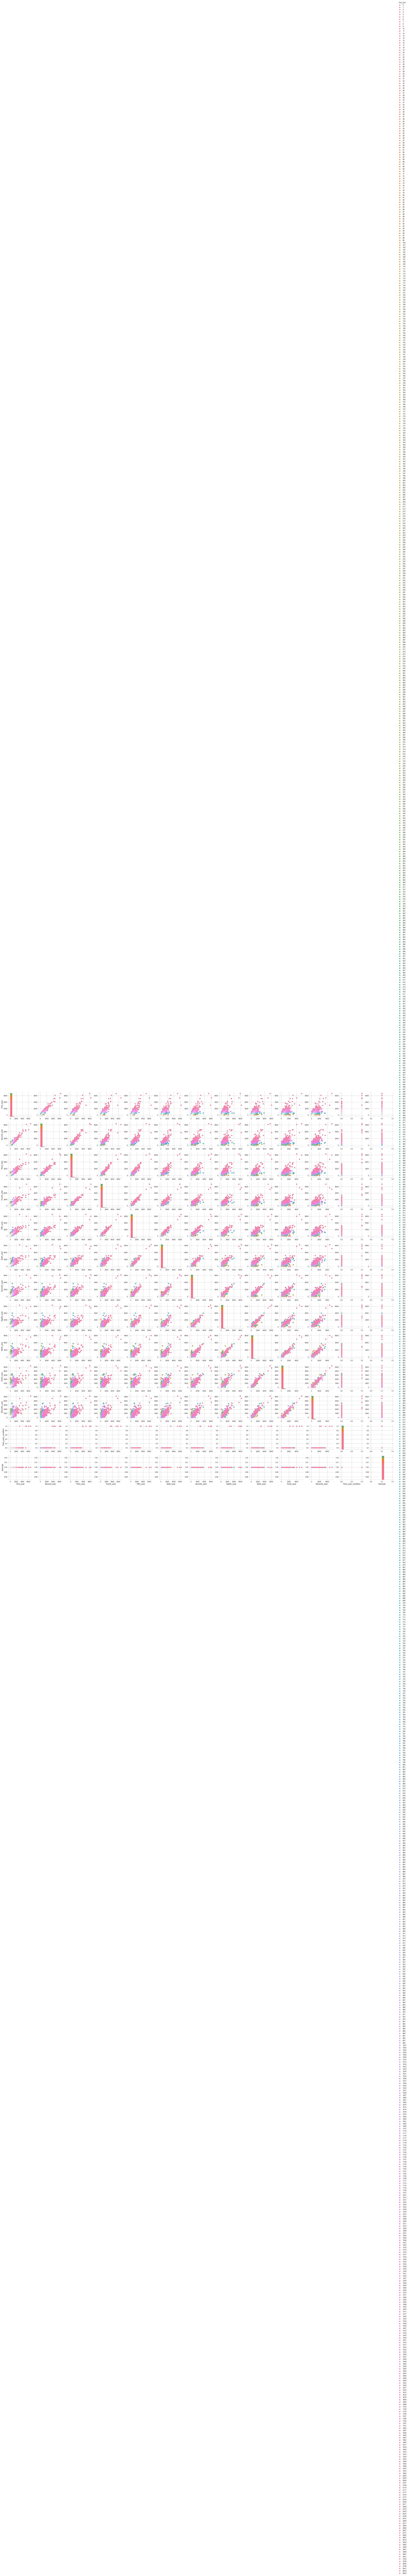

In [182]:
sns.pairplot(CrimeStatistics, hue="First_year")
plt.show()

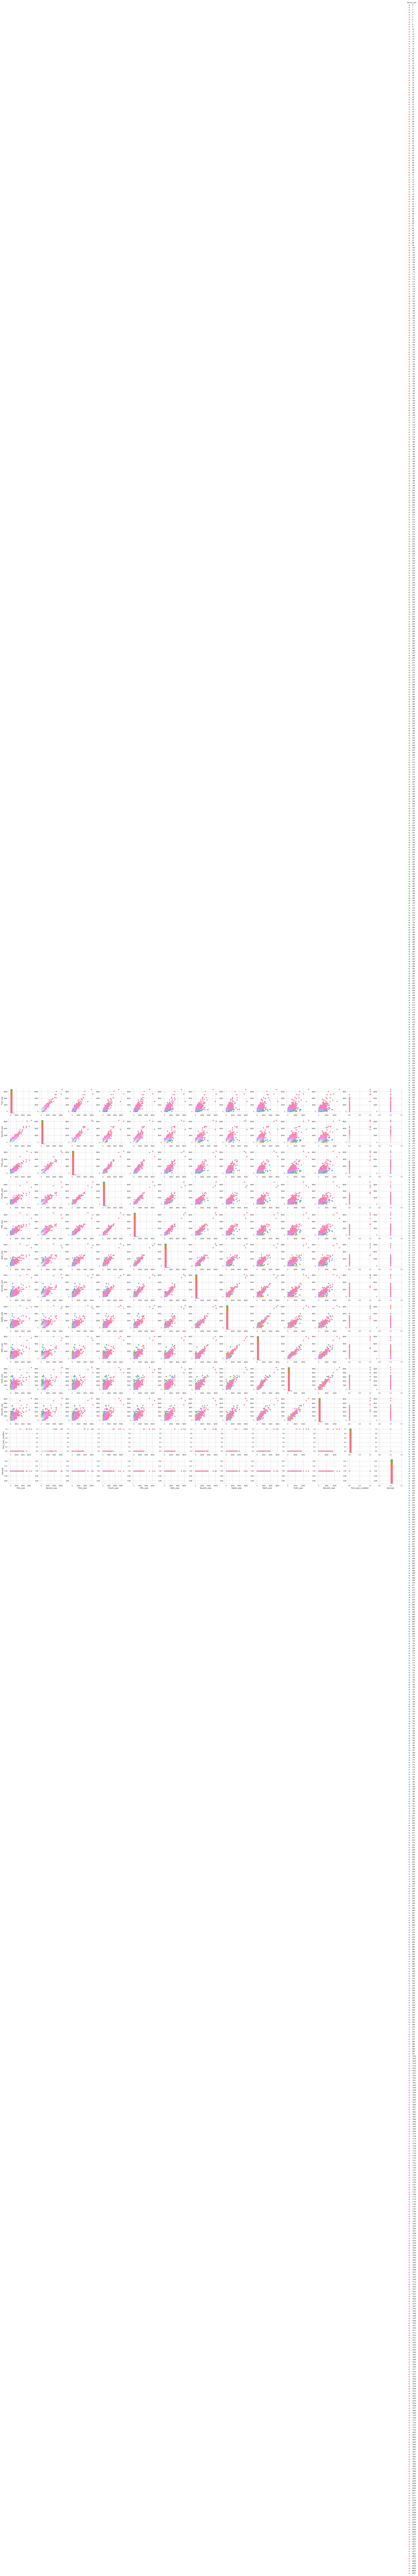

In [183]:
sns.pairplot(CrimeStatistics, hue="Second_year")
plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111e62d68>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1125e64a8>]], dtype=object)

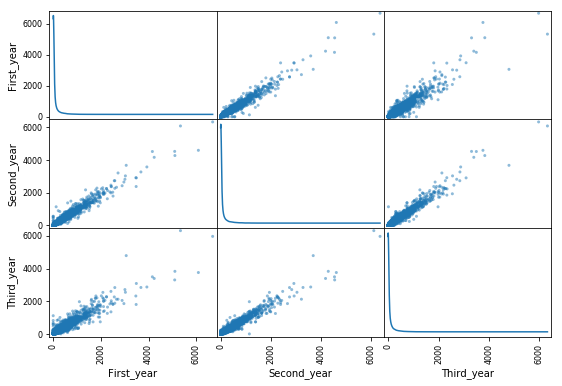

In [4]:
pd.scatter_matrix(CrimeStatistics[['First_year', 'Second_year','Third_year']], alpha=0.5, figsize=(9, 6), diagonal='kde')

In [7]:
%matplotlib inline
from collections import Counter
import random

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from scipy.stats import multivariate_normal

In [24]:
def set_colors(labels, colors='rgbykcm'):
    colored_labels = []
    for label in labels:
        if (label < 0) or (label > 5):
          colored_labels.append(colors[6]) 
        else:
          colored_labels.append(colors[label])
    return colored_labels




Counter({0: 28197, 2: 2389, 1: 275})


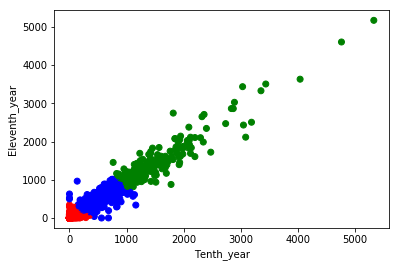

In [25]:
# Fit a k-means estimator
estimator = KMeans(n_clusters=3)
X = CrimeStatistics[["Tenth_year", "Eleventh_year"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(Counter(labels))

colors = set_colors(labels)
plt.scatter(CrimeStatistics["Tenth_year"], CrimeStatistics["Eleventh_year"], c=colors)
plt.xlabel("Tenth_year")
plt.ylabel("Eleventh_year")
plt.show()

Counter({0: 28197, 2: 2389, 1: 275})


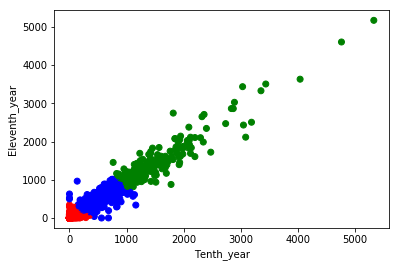

In [37]:
# Fit a k-means estimator
estimator = KMeans(n_clusters=3)
X = CrimeStatistics[["Tenth_year", "Eleventh_year"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(Counter(labels))

colors = set_colors(labels)
plt.scatter(CrimeStatistics["Tenth_year"], CrimeStatistics["Eleventh_year"], c=colors)
plt.xlabel("Tenth_year")
plt.ylabel("Eleventh_year")
plt.show()

Counter({0: 25682, 4: 3692, 1: 1146, 3: 295, 2: 46})


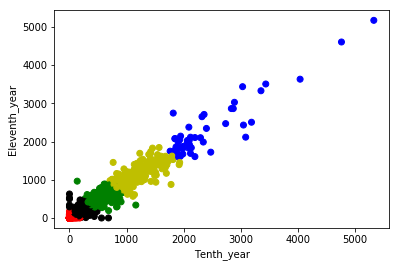

In [44]:
# Fit a k-means estimator
estimator = KMeans(n_clusters=5)
X = CrimeStatistics[["Tenth_year", "Eleventh_year"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(Counter(labels))

colors = set_colors(labels)
plt.scatter(CrimeStatistics["Tenth_year"], CrimeStatistics["Eleventh_year"], c=colors)
plt.xlabel("Tenth_year")
plt.ylabel("Eleventh_year")
plt.show()

Counter({0: 23100, 6: 4524, 3: 1785, 1: 860, 5: 401, 2: 145, 4: 40, 7: 6})


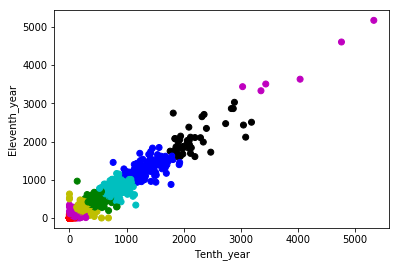

In [45]:
# Fit a k-means estimator
estimator = KMeans(n_clusters=8)
X = CrimeStatistics[["Tenth_year", "Eleventh_year"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(Counter(labels))

colors = set_colors(labels)
plt.scatter(CrimeStatistics["Tenth_year"], CrimeStatistics["Eleventh_year"], c=colors)
plt.xlabel("Tenth_year")
plt.ylabel("Eleventh_year")
plt.show()

##### As the charts above doesn't change a lot, to get this chart is to see whether there will be more obvious change between different columns.

Counter({4: 24992, 0: 3647, 5: 1387, 2: 605, 6: 171, 1: 51, 3: 8})


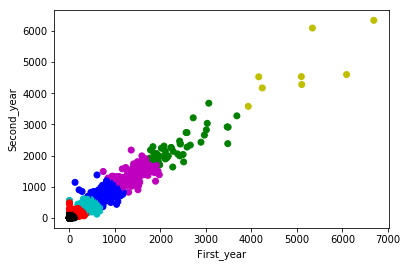

In [28]:
# Fit a k-means estimator
estimator = KMeans(n_clusters=7)
X = CrimeStatistics[["First_year", "Second_year"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(Counter(labels))

colors = set_colors(labels)
plt.scatter(CrimeStatistics["First_year"], CrimeStatistics["Second_year"], c=colors)
plt.xlabel("First_year")
plt.ylabel("Second_year")
plt.show()

In [184]:
# Fit a k-means estimator
estimator = KMeans(n_clusters=4)
X = CrimeStatistics[["First_year", "Second_year"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(Counter(labels))

colors = set_colors(labels)
plt.scatter(CrimeStatistics["First_year"], CrimeStatistics["Second_year"], c=colors)
plt.xlabel("First_year")
plt.ylabel("Second_year")
plt.show()

Counter({0: 27733, 2: 2488, 1: 571, 3: 69})


NameError: name 'set_colors' is not defined

In [27]:

print(labels[0])
a=(len(labels)*0.5)
print(int(a))
print(labels[-1]) 

1
15430
1


##### DBSCAN

Counter({-1: 13478, 268: 5453, 148: 828, 223: 790, 275: 460, 261: 300, 192: 298, 269: 295, 279: 270, 233: 232, 93: 177, 262: 174, 105: 156, 224: 155, 35: 144, 293: 136, 120: 131, 235: 113, 280: 110, 296: 107, 173: 99, 256: 98, 211: 93, 242: 87, 283: 87, 270: 82, 257: 78, 250: 77, 174: 73, 286: 72, 300: 72, 142: 71, 162: 70, 237: 69, 182: 68, 230: 67, 290: 63, 243: 62, 203: 59, 21: 58, 79: 57, 219: 57, 131: 56, 232: 56, 137: 53, 149: 53, 167: 53, 132: 52, 297: 48, 155: 47, 194: 47, 212: 47, 281: 47, 34: 45, 271: 45, 272: 45, 284: 45, 263: 44, 109: 43, 139: 43, 70: 40, 138: 40, 291: 40, 53: 39, 154: 39, 11: 38, 169: 38, 247: 38, 156: 37, 217: 37, 251: 37, 264: 36, 288: 36, 13: 34, 54: 34, 56: 34, 113: 34, 273: 34, 37: 33, 122: 33, 245: 33, 76: 32, 153: 32, 158: 32, 166: 32, 26: 31, 72: 31, 225: 31, 274: 31, 45: 30, 238: 30, 100: 29, 143: 29, 213: 29, 23: 28, 126: 28, 165: 28, 198: 28, 205: 28, 277: 28, 2: 27, 127: 27, 258: 27, 25: 26, 81: 26, 101: 26, 114: 26, 130: 26, 164: 25, 186: 25, 

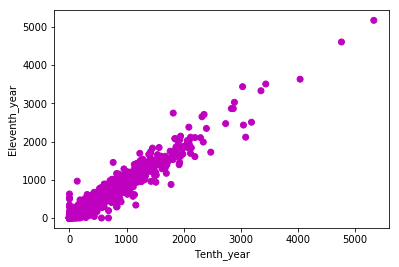

In [28]:

# Fit a DBSCAN estimator
estimator = DBSCAN(eps=0.85, min_samples=10)
X = CrimeStatistics[["Tenth_year", "Eleventh_year"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
# print labels
print(Counter(labels))

colors = set_colors(labels)
plt.scatter(CrimeStatistics['Tenth_year'], CrimeStatistics['Eleventh_year'], c=colors)
plt.xlabel("Tenth_year")
plt.ylabel("Eleventh_year")
plt.show()

Counter({-1: 13478, 268: 5453, 148: 828, 223: 790, 275: 460, 261: 300, 192: 298, 269: 295, 279: 270, 233: 232, 93: 177, 262: 174, 105: 156, 224: 155, 35: 144, 293: 136, 120: 131, 235: 113, 280: 110, 296: 107, 173: 99, 256: 98, 211: 93, 242: 87, 283: 87, 270: 82, 257: 78, 250: 77, 174: 73, 286: 72, 300: 72, 142: 71, 162: 70, 237: 69, 182: 68, 230: 67, 290: 63, 243: 62, 203: 59, 21: 58, 79: 57, 219: 57, 131: 56, 232: 56, 137: 53, 149: 53, 167: 53, 132: 52, 297: 48, 155: 47, 194: 47, 212: 47, 281: 47, 34: 45, 271: 45, 272: 45, 284: 45, 263: 44, 109: 43, 139: 43, 70: 40, 138: 40, 291: 40, 53: 39, 154: 39, 11: 38, 169: 38, 247: 38, 156: 37, 217: 37, 251: 37, 264: 36, 288: 36, 13: 34, 54: 34, 56: 34, 113: 34, 273: 34, 37: 33, 122: 33, 245: 33, 76: 32, 153: 32, 158: 32, 166: 32, 26: 31, 72: 31, 225: 31, 274: 31, 45: 30, 238: 30, 100: 29, 143: 29, 213: 29, 23: 28, 126: 28, 165: 28, 198: 28, 205: 28, 277: 28, 2: 27, 127: 27, 258: 27, 25: 26, 81: 26, 101: 26, 114: 26, 130: 26, 164: 25, 186: 25, 

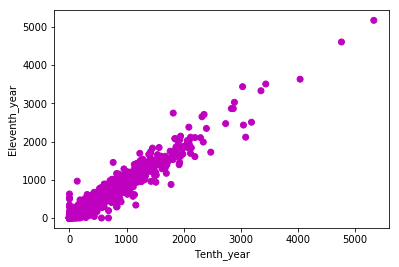

In [32]:

# Fit a DBSCAN estimator
estimator = DBSCAN(eps=0.70, min_samples=10)
X = CrimeStatistics[["Tenth_year", "Eleventh_year"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
# print labels
print(Counter(labels))

colors = set_colors(labels)
plt.scatter(CrimeStatistics['Tenth_year'], CrimeStatistics['Eleventh_year'], c=colors)
plt.xlabel("Tenth_year")
plt.ylabel("Eleventh_year")
plt.show()

Counter({18: 23717, -1: 6513, 11: 56, 30: 49, 15: 47, 10: 40, 20: 31, 37: 31, 7: 27, 12: 27, 36: 22, 6: 20, 35: 19, 13: 18, 9: 17, 17: 14, 0: 13, 2: 12, 3: 11, 23: 11, 34: 11, 1: 10, 4: 10, 8: 10, 14: 10, 22: 10, 25: 10, 26: 10, 27: 10, 28: 10, 31: 10, 33: 10, 21: 7, 24: 7, 32: 7, 19: 6, 38: 6, 5: 5, 29: 4, 16: 3})


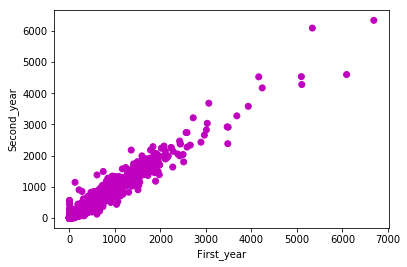

In [41]:

# Fit a DBSCAN estimator
estimator = DBSCAN(eps=1.9, min_samples=10)
X = CrimeStatistics[["First_year", "Second_year"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
# print labels
print(Counter(labels))

colors = set_colors(labels)
plt.scatter(CrimeStatistics['First_year'], CrimeStatistics['Second_year'], c=colors)
plt.xlabel("First_year")
plt.ylabel("Second_year")
plt.show()

Counter({-1: 13478, 268: 5453, 148: 828, 223: 790, 275: 460, 261: 300, 192: 298, 269: 295, 279: 270, 233: 232, 93: 177, 262: 174, 105: 156, 224: 155, 35: 144, 293: 136, 120: 131, 235: 113, 280: 110, 296: 107, 173: 99, 256: 98, 211: 93, 242: 87, 283: 87, 270: 82, 257: 78, 250: 77, 174: 73, 286: 72, 300: 72, 142: 71, 162: 70, 237: 69, 182: 68, 230: 67, 290: 63, 243: 62, 203: 59, 21: 58, 79: 57, 219: 57, 131: 56, 232: 56, 137: 53, 149: 53, 167: 53, 132: 52, 297: 48, 155: 47, 194: 47, 212: 47, 281: 47, 34: 45, 271: 45, 272: 45, 284: 45, 263: 44, 109: 43, 139: 43, 70: 40, 138: 40, 291: 40, 53: 39, 154: 39, 11: 38, 169: 38, 247: 38, 156: 37, 217: 37, 251: 37, 264: 36, 288: 36, 13: 34, 54: 34, 56: 34, 113: 34, 273: 34, 37: 33, 122: 33, 245: 33, 76: 32, 153: 32, 158: 32, 166: 32, 26: 31, 72: 31, 225: 31, 274: 31, 45: 30, 238: 30, 100: 29, 143: 29, 213: 29, 23: 28, 126: 28, 165: 28, 198: 28, 205: 28, 277: 28, 2: 27, 127: 27, 258: 27, 25: 26, 81: 26, 101: 26, 114: 26, 130: 26, 164: 25, 186: 25, 

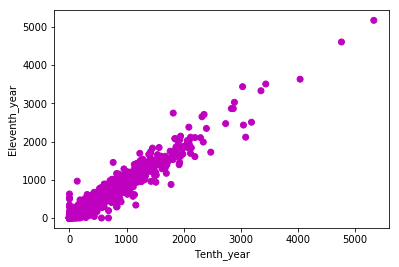

In [42]:
# change the values of "eps", and "min_samples" 
# Fit a DBSCAN
estimator = DBSCAN(eps=0.5, min_samples=10)
X = CrimeStatistics[["Tenth_year", "Eleventh_year"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (Counter(labels))

colors = set_colors(labels)
plt.scatter(CrimeStatistics["Tenth_year"], CrimeStatistics["Eleventh_year"], c=colors)
plt.xlabel("Tenth_year")
plt.ylabel("Eleventh_year")
plt.show()

Counter({-1: 13478, 268: 5453, 148: 828, 223: 790, 275: 460, 261: 300, 192: 298, 269: 295, 279: 270, 233: 232, 93: 177, 262: 174, 105: 156, 224: 155, 35: 144, 293: 136, 120: 131, 235: 113, 280: 110, 296: 107, 173: 99, 256: 98, 211: 93, 242: 87, 283: 87, 270: 82, 257: 78, 250: 77, 174: 73, 286: 72, 300: 72, 142: 71, 162: 70, 237: 69, 182: 68, 230: 67, 290: 63, 243: 62, 203: 59, 21: 58, 79: 57, 219: 57, 131: 56, 232: 56, 137: 53, 149: 53, 167: 53, 132: 52, 297: 48, 155: 47, 194: 47, 212: 47, 281: 47, 34: 45, 271: 45, 272: 45, 284: 45, 263: 44, 109: 43, 139: 43, 70: 40, 138: 40, 291: 40, 53: 39, 154: 39, 11: 38, 169: 38, 247: 38, 156: 37, 217: 37, 251: 37, 264: 36, 288: 36, 13: 34, 54: 34, 56: 34, 113: 34, 273: 34, 37: 33, 122: 33, 245: 33, 76: 32, 153: 32, 158: 32, 166: 32, 26: 31, 72: 31, 225: 31, 274: 31, 45: 30, 238: 30, 100: 29, 143: 29, 213: 29, 23: 28, 126: 28, 165: 28, 198: 28, 205: 28, 277: 28, 2: 27, 127: 27, 258: 27, 25: 26, 81: 26, 101: 26, 114: 26, 130: 26, 164: 25, 186: 25, 

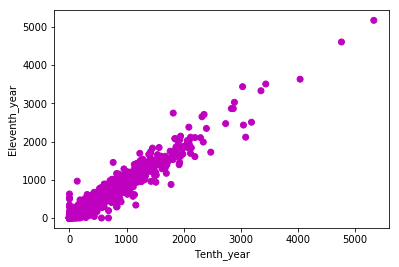

In [43]:
# Fit a DBSCAN
estimator = DBSCAN(eps=0.8, min_samples=10)
X = CrimeStatistics[["Tenth_year", "Eleventh_year"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (Counter(labels))

colors = set_colors(labels)
plt.scatter(CrimeStatistics["Tenth_year"], CrimeStatistics["Eleventh_year"], c=colors)
plt.xlabel("Tenth_year")
plt.ylabel("Eleventh_year")
plt.show()

##### From the charts above(DBSCAN), the result is a little bit disappointed, there should be different shapes with different centers or density.

#### Part2

#### Generate a linear model for your data:
Find a significant linear relation of your choosing in your data. Create a multivariate linear model. (50 points)
Answer the following questions for the multivariate linear model:
* Is the relationship significant?   
* Are any model assumptions violated?   
* Is there any multi-colinearity in the model?   
* In the multiple regression models are predictor variables independent of all the other predictor variables?   
* In in multiple regression models rank the most significant predictor variables and exclude insignificant ones from the model.   
* Does the model make sense?  
* Cross-validate the model. How well did it do?      
* Does regularization help with creating models that validate better on out of sample data? 

#### Multivariate linear model

In [17]:
from __future__ import print_function
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')

In [18]:
# Load the data into a pandas dataframe
df = pd.read_csv('CrimeStatistics.csv')
df.head()

Province            Station                           Category  \
0  Western Cape  Cape Town Central  All theft not mentioned elsewhere   
1       Gauteng        Jhb Central  All theft not mentioned elsewhere   
2  Western Cape    Mitchells Plain  All theft not mentioned elsewhere   
3    Free State          Park Road  All theft not mentioned elsewhere   
4       Gauteng   Pretoria Central  All theft not mentioned elsewhere   

   2005-2006  2006-2007  2007-2008  2008-2009  2009-2010  2010-2011  \
0       6692       6341       5966       5187       4985       5127   
1       6093       4602       3761       3610       3267       3037   
2       5341       6093       6316       6803       6035       5761   
3       5108       4282       3834       3316       3101       3013   
4       5099       4536       3309       2694       2616       2606   

   2011-2012  2012-2013  2013-2014  2014-2015  2015-2016  
0       5285       5937       5600       5335       5176  
1       2886       2638       2809       3050       2434  
2       6108       5514       4975       4043       3635  
3       2679       3116       2927       2297       2103  
4       2635       3226       3246       2892       3030

In [19]:
df.describe()

2005-2006     2006-2007     2007-2008     2008-2009     2009-2010  \
count  30861.000000  30861.000000  30861.000000  30861.000000  30861.000000   
mean      70.527753     69.301610     67.154305     68.756165     69.517773   
std      205.491698    198.037635    186.760510    187.173860    185.514638   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      1.000000   
50%        8.000000      8.000000      8.000000      9.000000      9.000000   
75%       49.000000     50.000000     50.000000     52.000000     54.000000   
max     6692.000000   6341.000000   6316.000000   6803.000000   6571.000000   

          2010-2011     2011-2012     2012-2013     2013-2014     2014-2015  \
count  30861.000000  30861.000000  30861.000000  30861.000000  30861.000000   
mean      67.766696     68.259616     69.700658     71.416999     71.498202   
std      181.865878    183.334468    184.812420    187.635207    185.019046   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      1.000000      1.000000      1.000000      1.000000   
50%        9.000000     10.000000     10.000000     11.000000     11.000000   
75%       52.000000     53.000000     55.000000     56.000000     57.000000   
max     6260.000000   6108.000000   6310.000000   6044.000000   5335.000000   

          2015-2016  
count  30861.000000  
mean      70.736496  
std      179.363964  
min        0.000000  
25%        1.000000  
50%       11.000000  
75%       58.000000  
max     5176.000000

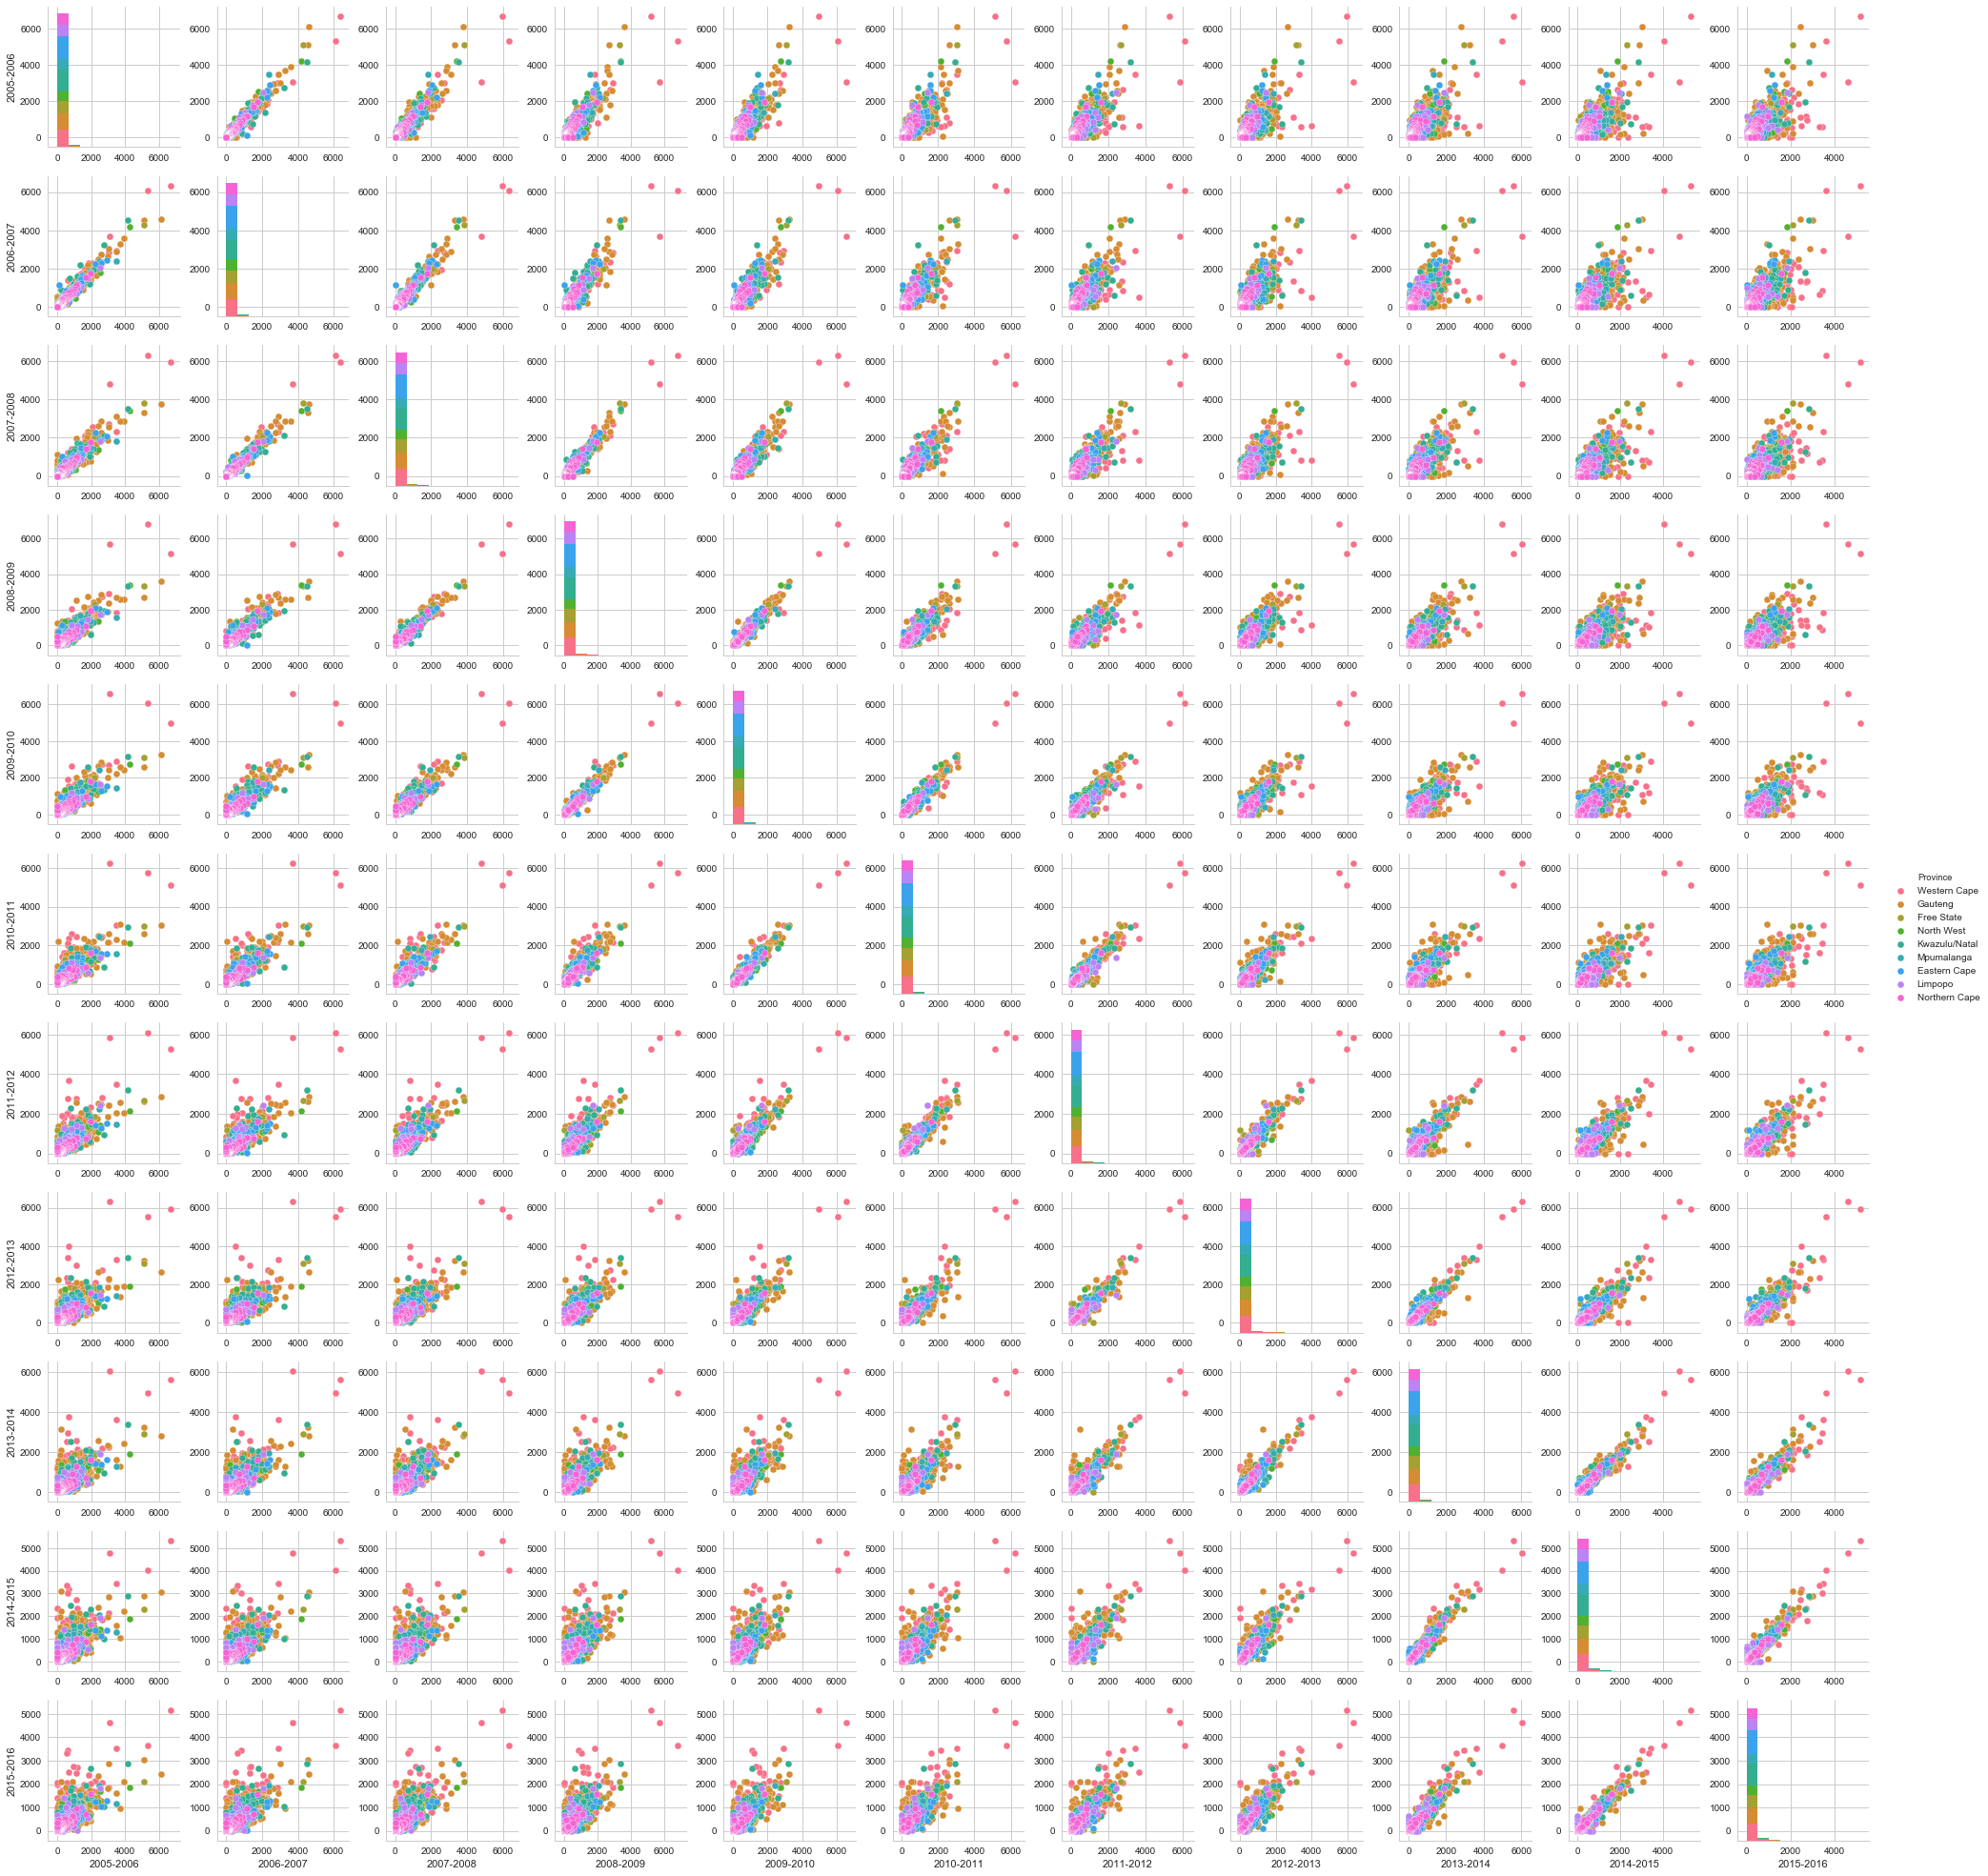

In [181]:

# Quick plot of the data using seaborn
sns.pairplot(df, hue="Province")
plt.show()

In [ ]:

# Quick plot of the data using seaborn
sns.pairplot(df, hue="Category")
plt.show()

In [20]:
def find_cluster_centers(matrix, k=4):
    k_means = KMeans(n_clusters=k)
    k_means.fit(matrix)
    return k_means.cluster_centers_

In [21]:
# change the name for each column.
CrimeStatistics.columns = ['Province','Station', 'Category',
              'First_year', 'Second_year', 'Third_year', 'Fourth_year','Fifth_year','Sixth_year','Seventh_year','Eighth_year','Ninth_year','Tenth_year','Eleventh_year']

CrimeStatistics.head(8)

Province            Station                           Category  \
0   Western Cape  Cape Town Central  All theft not mentioned elsewhere   
1        Gauteng        Jhb Central  All theft not mentioned elsewhere   
2   Western Cape    Mitchells Plain  All theft not mentioned elsewhere   
3     Free State          Park Road  All theft not mentioned elsewhere   
4        Gauteng   Pretoria Central  All theft not mentioned elsewhere   
5     North West         Rustenburg  All theft not mentioned elsewhere   
6  Kwazulu/Natal     Durban Central  All theft not mentioned elsewhere   
7        Gauteng           Brooklyn  All theft not mentioned elsewhere   

   First_year  Second_year  Third_year  Fourth_year  Fifth_year  Sixth_year  \
0        6692         6341        5966         5187        4985        5127   
1        6093         4602        3761         3610        3267        3037   
2        5341         6093        6316         6803        6035        5761   
3        5108         4282        3834         3316        3101        3013   
4        5099         4536        3309         2694        2616        2606   
5        4239         4173        3398         3388        2737        2117   
6        4162         4529        3499         3353        3183        2933   
7        3931         3583        2878         2568        2415        2162   

   Seventh_year  Eighth_year  Ninth_year  Tenth_year  Eleventh_year  
0          5285         5937        5600        5335           5176  
1          2886         2638        2809        3050           2434  
2          6108         5514        4975        4043           3635  
3          2679         3116        2927        2297           2103  
4          2635         3226        3246        2892           3030  
5          2139         1914        1897        1868           1862  
6          3219         3418        3390        2872           2865  
7          2050         1883        2442        2200           2107

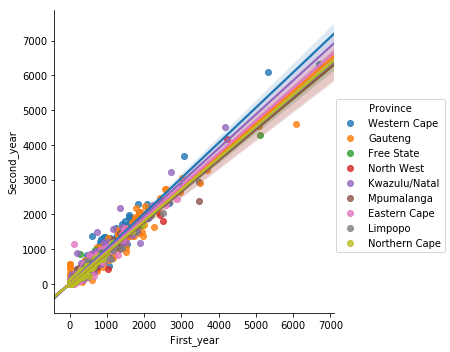

In [22]:
sns.lmplot(x="First_year", y="Second_year", data=CrimeStatistics,  hue="Province")
plt.show()

#### now we get the value for a and b, y= ax+b,

In [23]:


# from sklearn import linear_model

X = CrimeStatistics[["First_year"]]
y = CrimeStatistics[["Second_year"]]

# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)

# Print the coefficients
print (results.intercept_, results.coef_)

[ 2.5573086] [[ 0.94635514]]



This means that our best fit line is: $$y = a + b x$$

Which translates in to the equations below:

$$ second_{year} = 2.56 + 0.95 First_{year} + \varepsilon $$

#### Next let's use statsmodels.

In [24]:
# import statsmodels.api as sm
# Note the swap of X and y
model = sm.OLS(y, X)
results = model.fit()
# Statsmodels gives R-like statistical output
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Second_year   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                 9.347e+05
Date:                Thu, 22 Feb 2018   Prob (F-statistic):               0.00
Time:                        19:49:51   Log-Likelihood:            -1.5565e+05
No. Observations:               30861   AIC:                         3.113e+05
Df Residuals:                   30860   BIC:                         3.113e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
First_year     0.9502      0.001    966.821      0.000       0.948       0.952
==============================================================================
Omnibus:                    23225.931   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         33205780.078
Skew:                           2.194   Prob(JB):                         0.00
Kurtosis:                     163.637   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Is the relationship significant?

  ** Result from above **The coefficient for math is significantly different from 0 because both p-values are 0.000, which are smaller than 0.05. The result state that the coefficients has a very small possibility to be 0. So partly, the relationship is significant.
   
  
  

In [57]:

print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  First_year    0.950176
dtype: float64
R2:  0.968040714494


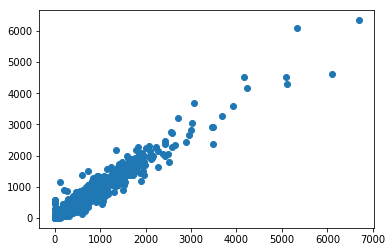

In [58]:
X = CrimeStatistics[["First_year"]]
y = CrimeStatistics[["Second_year"]]
plt.plot(X, y, "o")

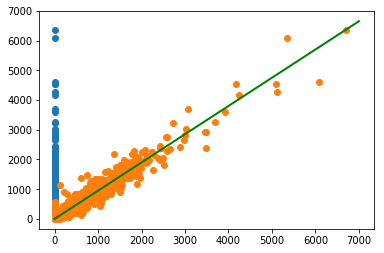

In [62]:

X = sm.add_constant(X) #  Our model needs an intercept so we add a column of 1s:
plt.plot(X, y, "o")
x2 = np.linspace(0, 80, 7000)
y2 = 2.56 + (0.95*x2)
plt.plot(x2, y2, lw=2, color="r")
x2 = np.linspace(0, 7000, 7000)
y2 = (0.950176*x2)
plt.plot(x2, y2, lw=2, color="g")
plt.show()

In [63]:

model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Second_year   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                 8.330e+05
Date:                Thu, 22 Feb 2018   Prob (F-statistic):               0.00
Time:                        18:52:58   Log-Likelihood:            -1.5558e+05
No. Observations:               30861   AIC:                         3.112e+05
Df Residuals:                   30859   BIC:                         3.112e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5573      0.225     11.352      0.000       2.116       2.999
First_year     0.9464      0.001    912.666      0.000       0.944       0.948
==============================================================================
Omnibus:                    24934.323   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         32824122.019
Skew:                           2.546   Prob(JB):                         0.00
Kurtosis:                     162.690   Cond. No.                         230.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:

print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  First_year    0.950176
dtype: float64
R2:  0.968040714494


#### Are any model assumptions violated?

Usually there are 4 assumptions for a model:  
  
① The Y-value(or the errors,"e") are independent  
② The Y-values can be expressed as a linear function of X variable  
③ Variation of observations around the regression line(the residual SE) is constant  
④ For given value of X,Y values (or the error) are Normally distributed  

The first assumptions base on the knowledge of study design or data collection  
The left 3 assumptions could be check by examinin the residuals or errors.

Most of the assumptions satisfied. As the value of R is very high.

#### Is there any multi-colinearity in the model?   
Multi-colinearity is very high, we can see that from the chart above.

#### In the multivariate models are predictor variables independent of all the other predictor variables?
Yes. The data in this dataset is highly correlated.


#### In multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

①One possibility is to measure the importance of a variable by the magnitude of its regression coefficient. This approach fails because the regression coefficients depend on the underlying scale of measurements. 
  
**First_year**, **Second_year** have same scales.

②Another possibility is to measure the importance of a variable by its observed significance level (P value). However, the distinction between statistical significant and practical importance applies here, too. Even if the predictors are measured on the same scale, a small coefficient that can be estimated precisely will have a small P value, while a large coefficient that is not estimate precisely will have a large P value.

The result is shown by the chart below. As I set this model before, I have deleted the most significant elements.

#### Does the model make sense?
Yes, it makes sense.


#### Does regularization help? 

Regularization is a method for reducing overfitting. We assess whether the regularization help by comparing the rmes value before and after Using ridge and lasso. As the model is highly correlated, so the regularization can help to build the model to avoid the noise produced by the elements with high correlation.

In [26]:
from sklearn import metrics


In [27]:
predictors = ['First_year','Second_year','Third_year']

X = sm.add_constant(CrimeStatistics[predictors])
y_mean = np.mean(CrimeStatistics['Fourth_year'])
model = sm.OLS(CrimeStatistics['Fourth_year'], X)
y_mean


68.75616473866693

In [28]:
ols_fit = model.fit()
y_pred = ols_fit.predict(X)
rmes_ols = np.sqrt(metrics.mean_squared_error(CrimeStatistics['Fourth_year'],y_pred))
rmes_ols


35.922813193782943

In [29]:
rmes_ols/y_mean


0.52246679741839586

In [30]:
lasso_fit = model.fit_regularized(L1_wt=1,alpha = 0.05)
lasso_pred = lasso_fit.predict(X)
rmes_lasso = np.sqrt(metrics.mean_squared_error(CrimeStatistics['Fourth_year'],lasso_pred))
rmes_lasso

37.030602061094648

In [31]:
rmes_lasso/y_mean

0.53857864530174215

In [32]:
ridge_fit = model.fit_regularized(L1_wt=0,alpha = 0.05)
ridge_pred = ridge_fit.predict(X)
rmes_ridge = np.sqrt(metrics.mean_squared_error(CrimeStatistics['Fourth_year'],ridge_pred))
rmes_ridge

35.923064117368988

In [33]:
rmes_ridge/y_mean


0.52247044688876698

### The Thire_year & Second_year

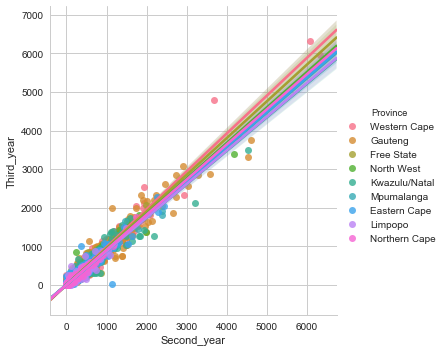

In [180]:
sns.lmplot(y="Third_year", x="Second_year", data=CrimeStatistics,  hue="Province")
plt.show()

In [34]:

# from sklearn import linear_model

X = CrimeStatistics[["Third_year"]]
y = CrimeStatistics[["Second_year"]]

# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)

# Print the coefficients
print (results.intercept_, results.coef_)

[-0.48492935] [[ 1.03919682]]


#### Part 3

#### Generate a logistic model for your data:
Find a significant logistic linear model of your choosing in your data. Create a logistic linear model. (25 points)
Answer the following questions for the logistic linear model:
* Is the relationship significant?  
  No, because the value of p is too big.
* Are any model assumptions violated?
  No, no ssumption is satisfied here.
* Cross-validate the model. How well did it do? 
  Nor performe very well.

In [157]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import warnings
import random
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from sklearn import metrics
import statsmodels.api as sm
import scipy.stats as stats 
from sklearn.linear_model import LogisticRegression

from datetime import datetime
random.seed(datetime.now())
warnings.filterwarnings('ignore')





## read the data from csv
CrimeStatistics = pd.read_csv('CrimeStatistics.csv', header=0)
## show the data samples of first 10 lines
CrimeStatistics.head(10)
plt.rcParams['figure.figsize'] = (15, 9)

In [158]:
import pandas as pd
from pandas.core import datetools

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

from sklearn import metrics
from sklearn.cross_validation import KFold, cross_val_score, train_test_split

%matplotlib inline 

In [159]:
## show the data samples of first 10 lines
df.head()

Province            Station                           Category  \
0  Western Cape  Cape Town Central  All theft not mentioned elsewhere   
1       Gauteng        Jhb Central  All theft not mentioned elsewhere   
2  Western Cape    Mitchells Plain  All theft not mentioned elsewhere   
3    Free State          Park Road  All theft not mentioned elsewhere   
4       Gauteng   Pretoria Central  All theft not mentioned elsewhere   

   2005-2006  2006-2007  2007-2008  2008-2009  2009-2010  2010-2011  \
0       6692       6341       5966       5187       4985       5127   
1       6093       4602       3761       3610       3267       3037   
2       5341       6093       6316       6803       6035       5761   
3       5108       4282       3834       3316       3101       3013   
4       5099       4536       3309       2694       2616       2606   

   2011-2012  2012-2013  2013-2014  2014-2015  2015-2016  
0       5285       5937       5600       5335       5176  
1       2886       2638       2809       3050       2434  
2       6108       5514       4975       4043       3635  
3       2679       3116       2927       2297       2103  
4       2635       3226       3246       2892       3030

In [160]:
# change the name for each column.
CrimeStatistics.columns = ['Province','Station', 'Category',
              'First_year', 'Second_year', 'Third_year', 'Fourth_year','Fifth_year','Sixth_year','Seventh_year','Eighth_year','Ninth_year','Tenth_year','Eleventh_year']

CrimeStatistics.head(5)

Province            Station                           Category  \
0  Western Cape  Cape Town Central  All theft not mentioned elsewhere   
1       Gauteng        Jhb Central  All theft not mentioned elsewhere   
2  Western Cape    Mitchells Plain  All theft not mentioned elsewhere   
3    Free State          Park Road  All theft not mentioned elsewhere   
4       Gauteng   Pretoria Central  All theft not mentioned elsewhere   

   First_year  Second_year  Third_year  Fourth_year  Fifth_year  Sixth_year  \
0        6692         6341        5966         5187        4985        5127   
1        6093         4602        3761         3610        3267        3037   
2        5341         6093        6316         6803        6035        5761   
3        5108         4282        3834         3316        3101        3013   
4        5099         4536        3309         2694        2616        2606   

   Seventh_year  Eighth_year  Ninth_year  Tenth_year  Eleventh_year  
0          5285         5937        5600        5335           5176  
1          2886         2638        2809        3050           2434  
2          6108         5514        4975        4043           3635  
3          2679         3116        2927        2297           2103  
4          2635         3226        3246        2892           3030

In [161]:
CrimeStatistics['Third_year_condition'] = CrimeStatistics['Third_year'] > 3500
CrimeStatistics['intercept'] = 1

CrimeStatistics.head()

Province            Station                           Category  \
0  Western Cape  Cape Town Central  All theft not mentioned elsewhere   
1       Gauteng        Jhb Central  All theft not mentioned elsewhere   
2  Western Cape    Mitchells Plain  All theft not mentioned elsewhere   
3    Free State          Park Road  All theft not mentioned elsewhere   
4       Gauteng   Pretoria Central  All theft not mentioned elsewhere   

   First_year  Second_year  Third_year  Fourth_year  Fifth_year  Sixth_year  \
0        6692         6341        5966         5187        4985        5127   
1        6093         4602        3761         3610        3267        3037   
2        5341         6093        6316         6803        6035        5761   
3        5108         4282        3834         3316        3101        3013   
4        5099         4536        3309         2694        2616        2606   

   Seventh_year  Eighth_year  Ninth_year  Tenth_year  Eleventh_year  \
0          5285         5937        5600        5335           5176   
1          2886         2638        2809        3050           2434   
2          6108         5514        4975        4043           3635   
3          2679         3116        2927        2297           2103   
4          2635         3226        3246        2892           3030   

   Third_year_condition  intercept  
0                  True          1  
1                  True          1  
2                  True          1  
3                  True          1  
4                 False          1

In [163]:
predictors = ['First_year','Second_year', 'intercept']
model = sm.Logit(CrimeStatistics['Third_year_condition'], CrimeStatistics[predictors]).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.000198
         Iterations 16


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                            
================================================================================
Dep. Variable:     Third_year_condition   No. Observations:                30861
Model:                            Logit   Df Residuals:                    30858
Method:                             MLE   Df Model:                            2
Date:                  Fri, 23 Feb 2018   Pseudo R-squ.:                  0.8744
Time:                          12:36:21   Log-Likelihood:                -6.1109
converged:                         True   LL-Null:                       -48.639
                                          LLR p-value:                 3.392e-19
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
First_year      0.0005      0.001      0.361      0.718      -0.002       0.003
Second_year     0.0024      0.002      1.446      0.148      -0.001       0.006
intercept     -13.1170      2.956     -4.437      0.000     -18.911      -7.323
===============================================================================

Possibly complete quasi-separation: A fraction 1.00 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [164]:
metrics.accuracy_score(CrimeStatistics['Third_year_condition'], model.predict(CrimeStatistics[predictors]) == 1)

0.99983798321506112

In [165]:
conf = model.conf_int()
conf['OddsRatio'] = model.params
conf.columns = ['2.5%', '97.5%', 'OddsRatio']
np.exp(conf)

2.5%     97.5%  OddsRatio
First_year   9.978339e-01  1.003154   1.000490
Second_year  9.991341e-01  1.005760   1.002441
intercept    6.123023e-09  0.000660   0.000002

In [170]:
rmse = np.sqrt(metrics.mean_squared_error(CrimeStatistics['Third_year_condition'], model.predict(CrimeStatistics[predictors])))
rmse

0.0079242066641019189

In [171]:
scores = []
for train, test in KFold(len(CrimeStatistics[predictors]), n_folds = 10):
    model = sm.Logit(CrimeStatistics['Third_year_condition'].iloc[train], CrimeStatistics[predictors].iloc[train]).fit()
    y_pred = model.predict(CrimeStatistics[predictors].iloc[test])
    y_true = CrimeStatistics['Third_year_condition'].iloc[test]
    score = np.sqrt(metrics.mean_squared_error(y_true, y_pred))
    scores.append(score)
scores

PerfectSeparationError: Perfect separation detected, results not available

In [172]:
np.mean(scores)

nan